# Domácí úkol
## Část 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_row -= 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [3]:
A = integer_spiral(5)
print(A)

[[13. 12. 11. 10. 25.]
 [14.  3.  2.  9. 24.]
 [15.  4.  1.  8. 23.]
 [16.  5.  6.  7. 22.]
 [17. 18. 19. 20. 21.]]


In [4]:
def integer_spiral_numpy(n):
        #TODO naimplementujte viz zadání  + otestovat rychlost obou zadani
    layer = (n - 1)//2
    
    B = np.zeros((n + 1, n + 1), dtype=int)

    B[n//2 + 1, n//2 + 1] = 1

    pos_row = n//2 
    pos_col = n//2 + 1

    spiral_nums = 2
    
    
    for i in range (1, layer + 1):
        len_slice = 2*i 
        B[pos_row, pos_col:pos_col - len_slice:-1] = np.arange(spiral_nums, spiral_nums + len_slice)
        spiral_nums = spiral_nums + len_slice
        
        B[pos_row+1:pos_row+len_slice+1,pos_col - len_slice +1] = np.arange(spiral_nums , spiral_nums+len_slice)
        spiral_nums = spiral_nums + len_slice

        B[pos_row + len_slice,pos_col-len_slice + 2:pos_col+2:] = np.arange(spiral_nums , spiral_nums+len_slice)
        spiral_nums = spiral_nums + len_slice

        B[pos_row + len_slice - 1:pos_row-1:-1,pos_col+1] = np.arange(spiral_nums , spiral_nums+len_slice)
        spiral_nums = spiral_nums + len_slice

        pos_row -=1
        pos_col +=1
        
    return B[1::,1::]

In [5]:
print(integer_spiral_numpy(9))

[[57 56 55 54 53 52 51 50 81]
 [58 31 30 29 28 27 26 49 80]
 [59 32 13 12 11 10 25 48 79]
 [60 33 14  3  2  9 24 47 78]
 [61 34 15  4  1  8 23 46 77]
 [62 35 16  5  6  7 22 45 76]
 [63 36 17 18 19 20 21 44 75]
 [64 37 38 39 40 41 42 43 74]
 [65 66 67 68 69 70 71 72 73]]


In [6]:
%%timeit
integer_spiral(1000)

1.41 s ± 194 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%%timeit
integer_spiral_numpy(1000)

4.49 ms ± 117 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Část 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.
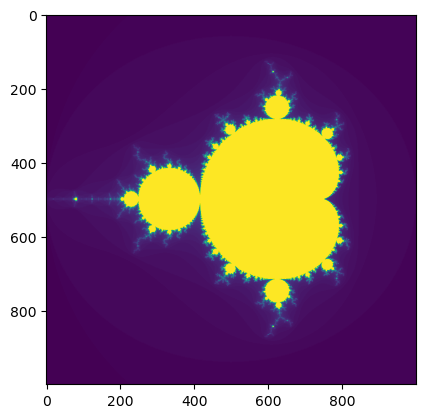

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, kolikáté iteraci $k$ je se stalo, že $|z_i| < 2$
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [8]:
def mandelbrot_set(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):
    # TODO naimplementujte viz zadání
   com_x =  np.linspace(x_min,x_max,n) #realna osa
   com_y = np.linspace(y_min,y_max,n) #imaginarni osa
   real_mat,img_mat = np.meshgrid(com_x,com_y)
   comp_mat = np.vectorize(complex)(real_mat,img_mat)
   div_mat = np.zeros_like(comp_mat, dtype=int)
   z_mat = comp_mat.copy()
  
   for x in range(k):
    
        mask_mat = np.abs(z_mat) < 2

        div_mat[mask_mat] += 1
       
        z_mat[mask_mat] = z_mat[mask_mat]**2 + comp_mat[mask_mat]

    
   return div_mat

     
     
      

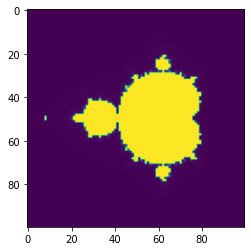

In [10]:
n = 100
k = 1000

divergence_matrix = mandelbrot_set(n=n, k=k)
plt.imshow(divergence_matrix)

# Bonus
- Zkuste si číselnou spirálu vykreslit, a vykreslit různé funkce, můžete dostat zajímavé obrázky.
- Zkuste místo posloupnosti 1,2,... udělat spirálu pouze z prvočísel.
- Zkuste vykresilt další typy fraktálů, např. Julia set viz [Wikipedia](https://en.wikipedia.org/wiki/Julia_set).

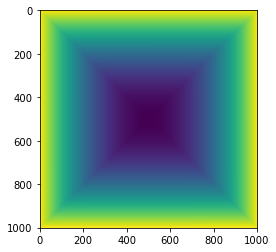

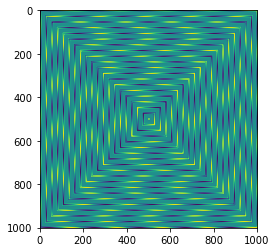

In [11]:
A = integer_spiral(1001)
plt.imshow(A)
# new figure
plt.figure()
plt.imshow(np.sin(A*0.03))

In [12]:
def prime_num_find(n):
    if n == 1:
        return False
    for i in range(2, int(n**1/2)+1):
        if n % i == 0:
            return False    
    return True


def prvocisla_spiral_numpy(n):
        #TODO naimplementujte viz zadání  + otestovat rychlost obou zadani
    
    primes = np.arange(1, n**2+1)
    layer = (n - 1)//2
    for j in range(n**2):
        if(prime_num_find(primes[j])==False):
            primes[j] = 0
        else:
            primes[j] = j+1
    
    B = np.zeros((n + 1, n + 1), dtype=int)

    B[n//2 + 1, n//2 + 1] = primes[0]

    pos_row = n//2 
    pos_col = n//2 + 1

    spiral_nums = 1
    
    
    for i in range (1, layer + 1):
        len_slice = 2*i 
        B[pos_row, pos_col:pos_col - len_slice:-1] = primes[spiral_nums:spiral_nums + len_slice:]
        spiral_nums = spiral_nums + len_slice
        
        B[pos_row+1:pos_row+len_slice+1,pos_col - len_slice +1] = primes[spiral_nums:spiral_nums+len_slice:]
        spiral_nums = spiral_nums + len_slice

        B[pos_row + len_slice,pos_col-len_slice + 2:pos_col+2:] = primes[spiral_nums:spiral_nums+len_slice:]
        spiral_nums = spiral_nums + len_slice

        B[pos_row + len_slice - 1:pos_row-1:-1,pos_col+1] = primes[spiral_nums:spiral_nums+len_slice:]
        spiral_nums = spiral_nums + len_slice

        pos_row -=1
        pos_col +=1
        
    return B[1::,1::]

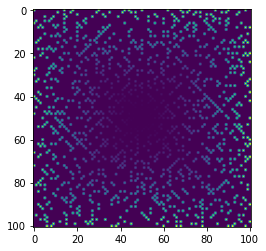

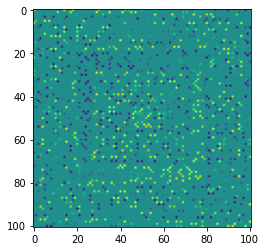

In [13]:
A =prvocisla_spiral_numpy(101)
plt.imshow(A)
# new figure
plt.figure()
plt.imshow(np.sin(A*0.03))

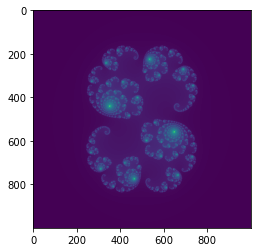

In [14]:
def julian_set(x_min = -1.6, x_max = 1.6, y_min = -1.6, y_max = 1.6, n = 1000, k = 300, c = 0.285 + 0.01j):
    
   com_x =  np.linspace(x_min,x_max,n) #realna osa
   com_y = np.linspace(y_min,y_max,n) #imaginarni osa
   real_mat,img_mat = np.meshgrid(com_x,com_y)
   comp_mat = np.zeros((n, n))
   div_mat = np.zeros_like(comp_mat, dtype=int)
   z_mat = np.vectorize(complex)(real_mat,img_mat)
  
   for x in range(k):
    
        mask_mat = np.abs(z_mat) < 2

        div_mat[mask_mat] += 1
       
        z_mat[mask_mat] = z_mat[mask_mat]**2 + (comp_mat[mask_mat] + c)

    
   return div_mat
   
divergence_matrix = julian_set()
plt.imshow(divergence_matrix)